```
From: https://github.com/ksatola
Version: 0.1.0
```

# Model - PM2.5 - Baseline Reference Models

## Contents

- [Persistence Baseline Models for Forecasting](#base)
- [Moving Average Forecasts](#base2)
- [Load hourly data and decompose](#data_h)
- [Load daily data and decompose](#data_d)
- Naive Forecasting
    - [Zero Rule Algorithm](#saf)
    - [Persistence Model](#per)
- Moving Average Forecasts
    - [Simple Moving Average](#sma)
    - [Exponential Moving Average](#ema)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys
sys.path.insert(0, '../src')

In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [5]:
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from model import (
    get_pm25_data_for_modelling,
    split_df_for_ts_modelling_percentage,
    split_df_for_ts_modelling_date_range
)

from measure import (
    get_rmse
)

from plot import (
    plot_observed_vs_predicted,
    plot_train_test_predicted,
    plot_stl,
    plot_before_after
)

from stats import (
    adfuller_test
)

---
<a id='base'></a>

## Persistence Baseline Models for Forecasting

Establishing a baseline is essential for any time series forecasting problem. A baseline in performance gives you an idea of how well all other models will actually perform on your problem.

A baseline in forecast performance provides a point of comparison. It is a point of reference for all other modeling techniques on your problem. If a model achieves performance at or below the baseline, the technique should be fixed or abandoned. 

The technique used to generate a forecast to calculate the baseline performance must be easy to implement and naive of problem-specific details. Once prepared, you then need to select a naive technique that you can use to make a forecast and calculate the baseline performance. Three properties of a good technique for making a baseline forecast are: 

- **Simple:** A method that requires little or no training or intelligence.
- **Fast:** A method that is fast to implement and computationally trivial to make a prediction.
- **Repeatable:** A method that is deterministic, meaning that it produces an expected output given the same input.

Baseline forecasts quickly flesh out whether you can do significantly better. If you can’t, you’re probably working with a random walk.

There can be many naive forecast methods, here we examine two:

- **Simple Average Forecast (Zero Rule Algorithm)**
- **Persistence Model**

---
<a id='base2'></a>
## Moving Average Forecasts

With the `moving average approach` we take n values previously known, calculate their average and take it as the next value. This new value is then added to the training set and a new average of n lags is calculated to predict the next point (and so on). As a forecasting method, there are situations where this technique works the best.

`Moving average smoothing` is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions.

`Smoothing` is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. `Moving averages` are a simple and common type of smoothing used in time series analysis and time series forecasting.

There are various types of moving averages:

- **Simple Moving Average (SMA):** uses a sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous n data.
- **Cumulative Moving Average (CMA):** Unlike `Simple Moving Average` which drops the oldest observation as the new one gets added, cumulative moving average considers all prior observations. CMA averages out all of the previous data up until the current data point, which make it very similar to the `Simple Average Forecast` technique.
- **Exponential Moving Average (EMA):** gives more weight to the recent observations and as a result of which, it can be a better model or better capture the movement of the trend in a faster way. EMA's reaction is directly proportional to the pattern of the data. Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest data points value changes as compared to SMAs.

---
<a id='data_h'></a>

## Load hourly data

In [7]:
dfh = get_pm25_data_for_modelling('ts', 'h')
dfh.head()

common.py | 42 | get_pm25_data_for_modelling | 02-Jun-20 23:24:40 | INFO: Dataframe loaded: /Users/ksatola/Documents/git/air-polution/agh/data/dfpm25_2008-2018_hourly.hdf
common.py | 43 | get_pm25_data_for_modelling | 02-Jun-20 23:24:40 | INFO: Dataframe size: (96388, 1)


,pm25
Datetime,
2008-01-01 01:00:00,92.0
2008-01-01 02:00:00,81.0
2008-01-01 03:00:00,73.0
2008-01-01 04:00:00,60.5
2008-01-01 05:00:00,61.0


In [8]:
dfh.tail(24)

,pm25
Datetime,
2018-12-31 01:00:00,7.23137
2018-12-31 02:00:00,6.82297
2018-12-31 03:00:00,6.34370
2018-12-31 04:00:00,6.05348
2018-12-31 05:00:00,5.36824
2018-12-31 06:00:00,5.25741
2018-12-31 07:00:00,5.23353
2018-12-31 08:00:00,4.78421
2018-12-31 09:00:00,5.68586


In [9]:
train_range_from_h = '2008-01-01 02:00:00'
train_range_to_h = '2018-12-30 23:00:00'
test_range_from_h = '2018-12-31 01:00:00'
test_range_to_h = None

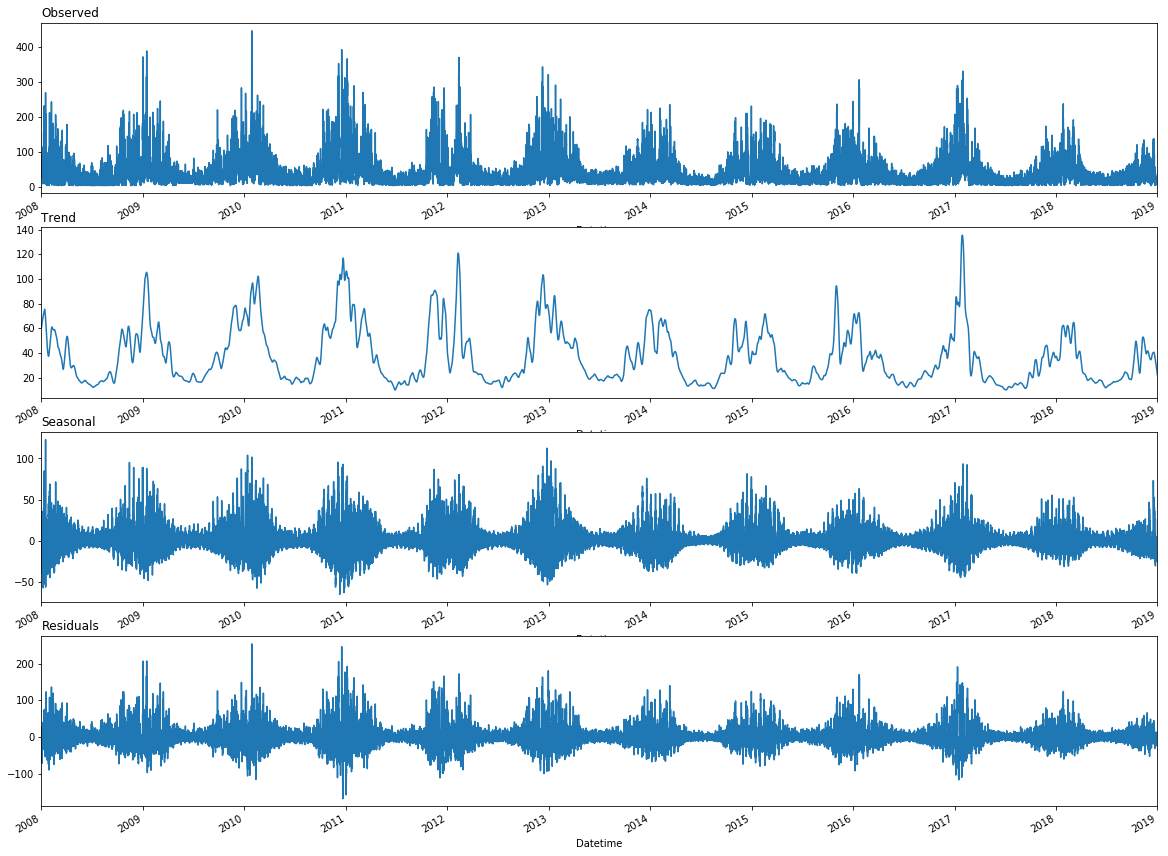

In [13]:
# Decompose time series
decomposed_dfh = plot_stl(data=dfh['pm25'], period=365, low_pass=367)

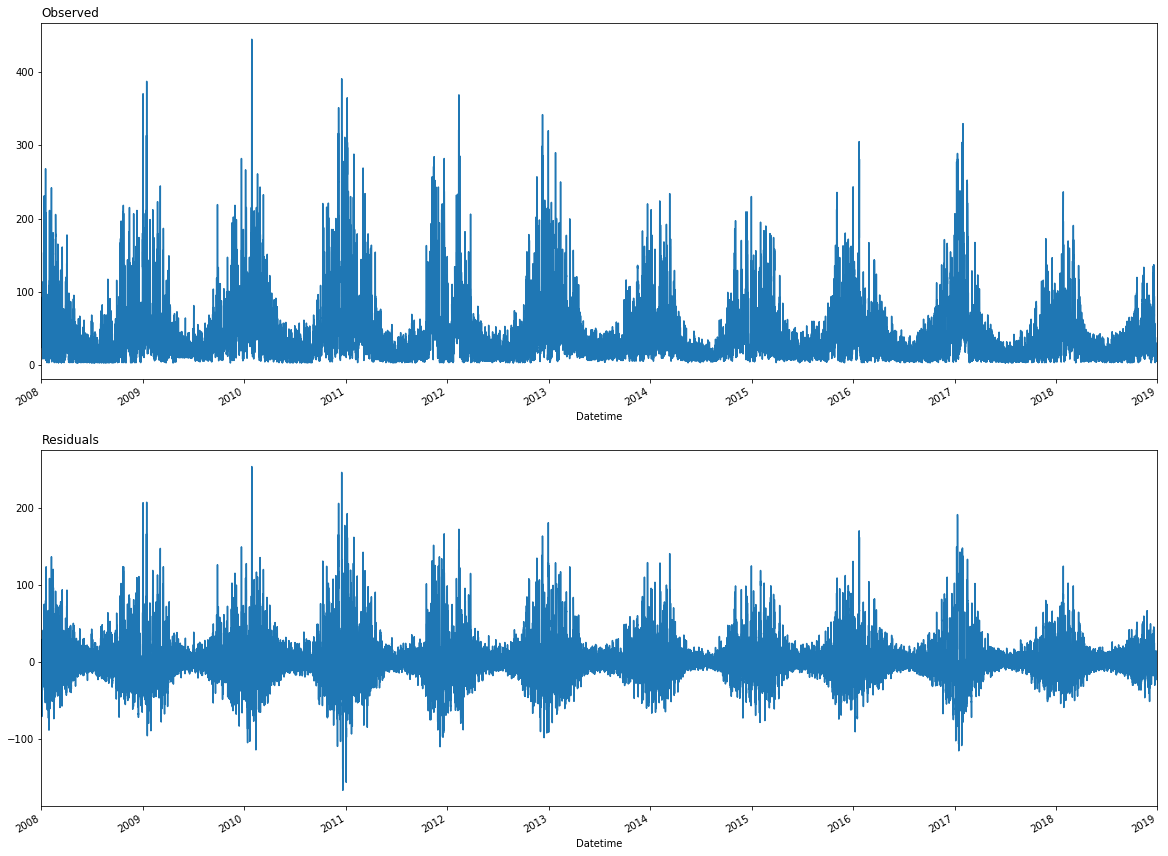

In [16]:
# Compare visually
plot_before_after(decomposed_dfh.observed, decomposed_dfh.resid, "Observed", "Residuals")

In [18]:
# Check for stationarity
adfuller_test(decomposed_dfh.resid)

Test statistic: -34.39472832921283
P-value: 0.0 -> 0.0000000000000000
Critical values: {'1%': -3.4304178932130585, '5%': -2.8615700077238575, '10%': -2.5667859720635713}
The time series does not have a unit root, so it is stationary (reject H0)


---
<a id='data_d'></a>

## Load daily data

In [19]:
dfd = get_pm25_data_for_modelling('ts', 'd')
dfd.head()

common.py | 42 | get_pm25_data_for_modelling | 02-Jun-20 23:28:27 | INFO: Dataframe loaded: /Users/ksatola/Documents/git/air-polution/agh/data/dfpm25_2008-2018_daily.hdf
common.py | 43 | get_pm25_data_for_modelling | 02-Jun-20 23:28:27 | INFO: Dataframe size: (4019, 1)


,pm25
Datetime,
2008-01-01,53.586957
2008-01-02,30.958333
2008-01-03,46.104167
2008-01-04,42.979167
2008-01-05,57.312500


In [20]:
dfd.tail(7)

,pm25
Datetime,
2018-12-26,17.102352
2018-12-27,15.274438
2018-12-28,18.614863
2018-12-29,16.241051
2018-12-30,15.514396
2018-12-31,12.595460
2019-01-01,36.607400


In [21]:
train_range_from_d = '2008-01-01'
train_range_to_d = '2018-12-25'
test_range_from_d = '2018-12-26'
test_range_to_d = None

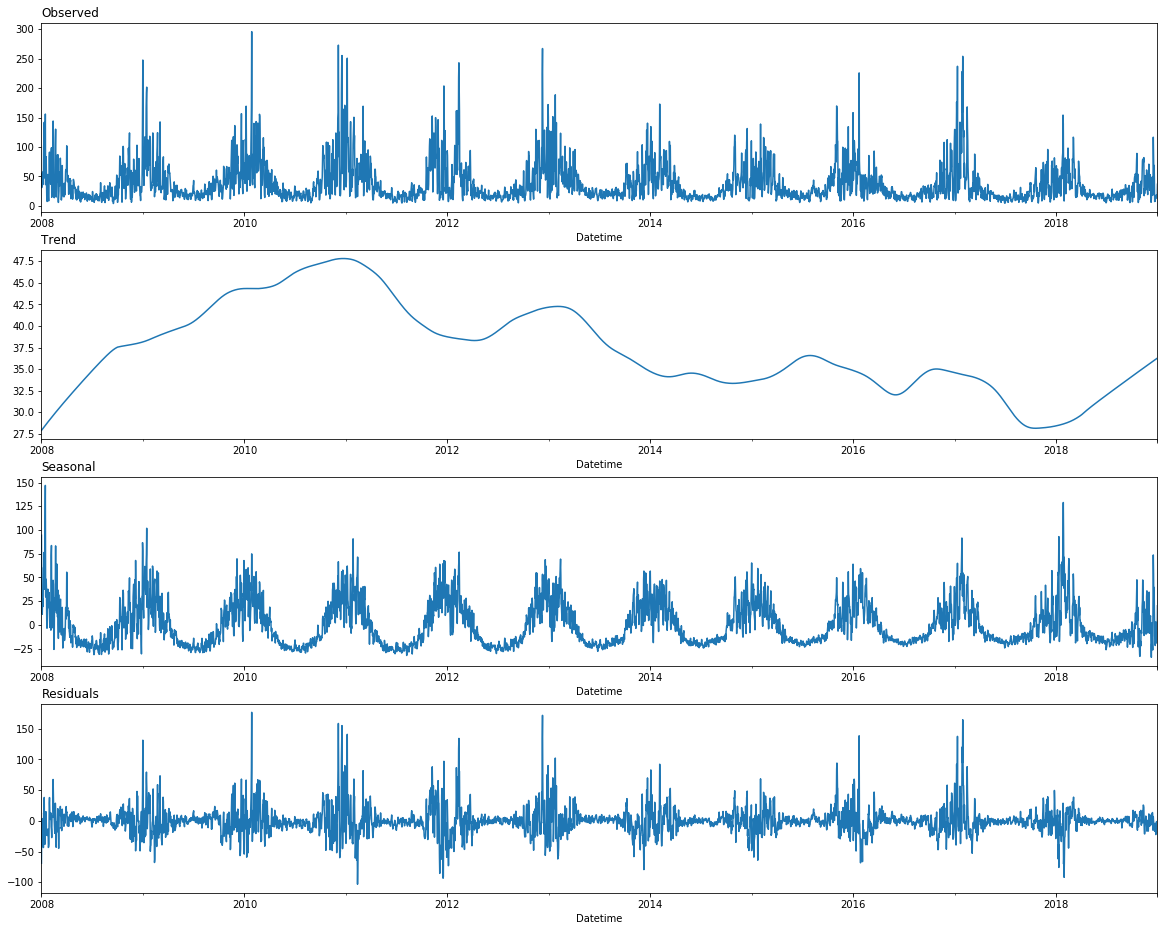

In [22]:
# Decompose time series
decomposed_dfd = plot_stl(data=dfd['pm25'], period=365, low_pass=367)

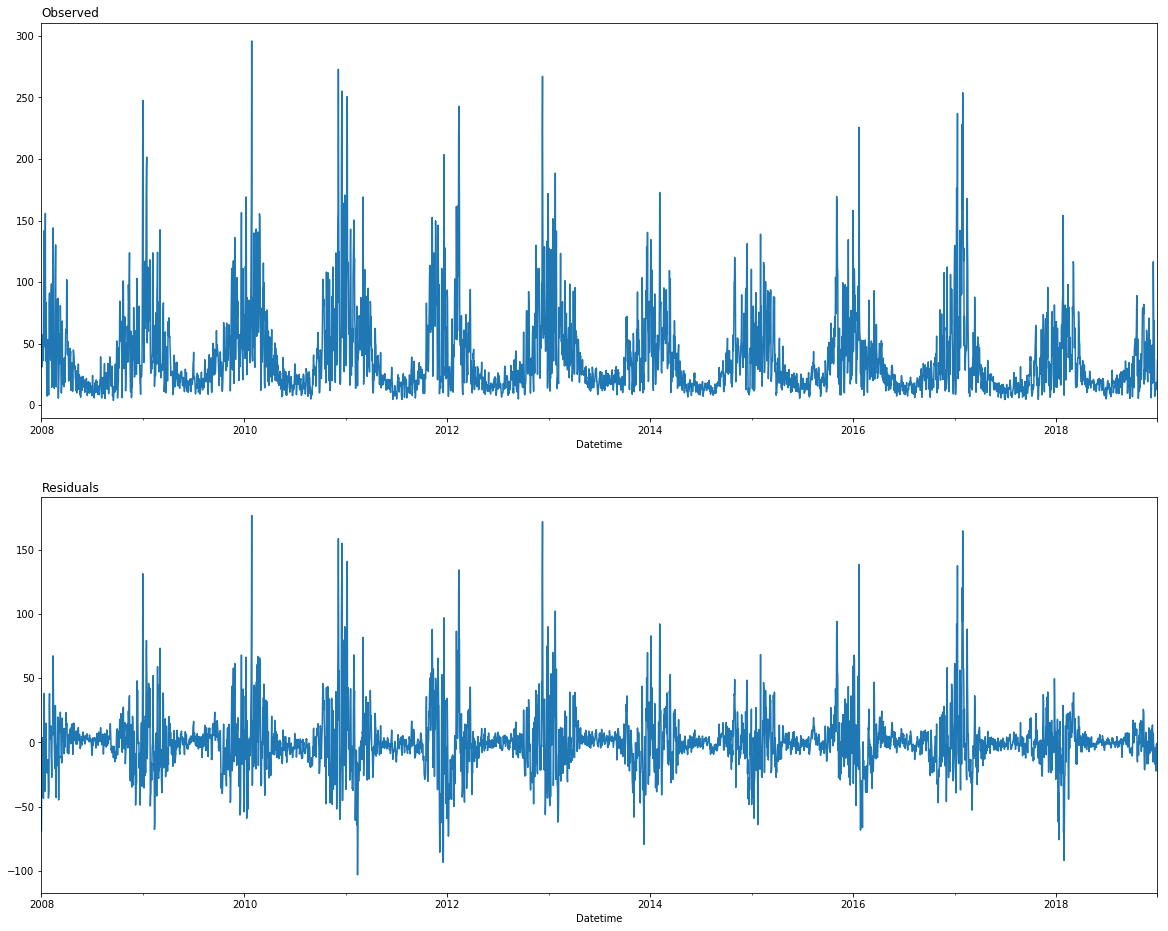

In [23]:
# Compare visually
plot_before_after(decomposed_dfd.observed, decomposed_dfd.resid, "Observed", "Residuals")

In [24]:
# Check for stationarity
adfuller_test(decomposed_dfd.resid)

Test statistic: -12.04972808762017
P-value: 2.614368859594535e-22 -> 0.0000000000000000
Critical values: {'1%': -3.431989155785145, '5%': -2.8622642893621704, '10%': -2.5671555470083454}
The time series does not have a unit root, so it is stationary (reject H0)


---
<a id='saf'></a>

## Simple Average Forecast (Zero Rule Algorithm)
The most common baseline method for supervised machine learning is the `Zero Rule Algorithm`. This algorithm predicts the majority class in the case of classification, or the average outcome in the case of regression. 

<img src="images/ts_002_simple_average.png" style="width: 200px;"/>

With the `Simple Average Forecast` approach we take all the values previously known, calculate the average and take it as all the next values.

This method is better from the `Persistence Model` (below) as it does not depend on the value of the last train dataset observation, instead it uses calculated once mean of the entire train dataset. Simple average and naive forecasting predict a constant value.

For a seasonal data we have here, this approach can be more fair (on average) but because of existing outliers, it will be constantly wrong in most cases (for most prediction points).

In [25]:
model_name = 'Simple Average Forecast'

### 24-Hour Prediction

In [33]:
df = decomposed_dfh.resid.to_frame()
df.columns = ['pm25']
df.head()

,pm25
Datetime,
2008-01-01 01:00:00,28.537801
2008-01-01 02:00:00,23.611710
2008-01-01 03:00:00,20.936157
2008-01-01 04:00:00,14.019144
2008-01-01 05:00:00,14.163808


In [34]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_h,
                                         train_range_to=train_range_to_h,
                                         test_range_from=test_range_from_h,
                                         test_range_to=test_range_to_h)

common.py | 127 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:33:09 | INFO: Observations: 96388
common.py | 128 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:33:09 | INFO: Training Observations: 96362
common.py | 129 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:33:09 | INFO: Testing Observations: 24
common.py | 131 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:33:09 | INFO: (96388, 1), (96362, 1), (24, 1), 96386


In [35]:
# Fit the model: Take an average of entire known dataset
model_fitted = df_train.mean()
model_fitted

pm25    0.007781
dtype: float64

In [36]:
# Predict
predicted = df_test.copy()
predicted['pred'] = model_fitted.values[0]
predicted

,pm25,pred
Datetime,,
2018-12-31 01:00:00,1.863587,0.007781
2018-12-31 02:00:00,5.492393,0.007781
2018-12-31 03:00:00,5.360633,0.007781
2018-12-31 04:00:00,1.703924,0.007781
2018-12-31 05:00:00,1.219429,0.007781
2018-12-31 06:00:00,-1.380934,0.007781
2018-12-31 07:00:00,0.836307,0.007781
2018-12-31 08:00:00,-1.339836,0.007781
2018-12-31 09:00:00,0.581865,0.007781


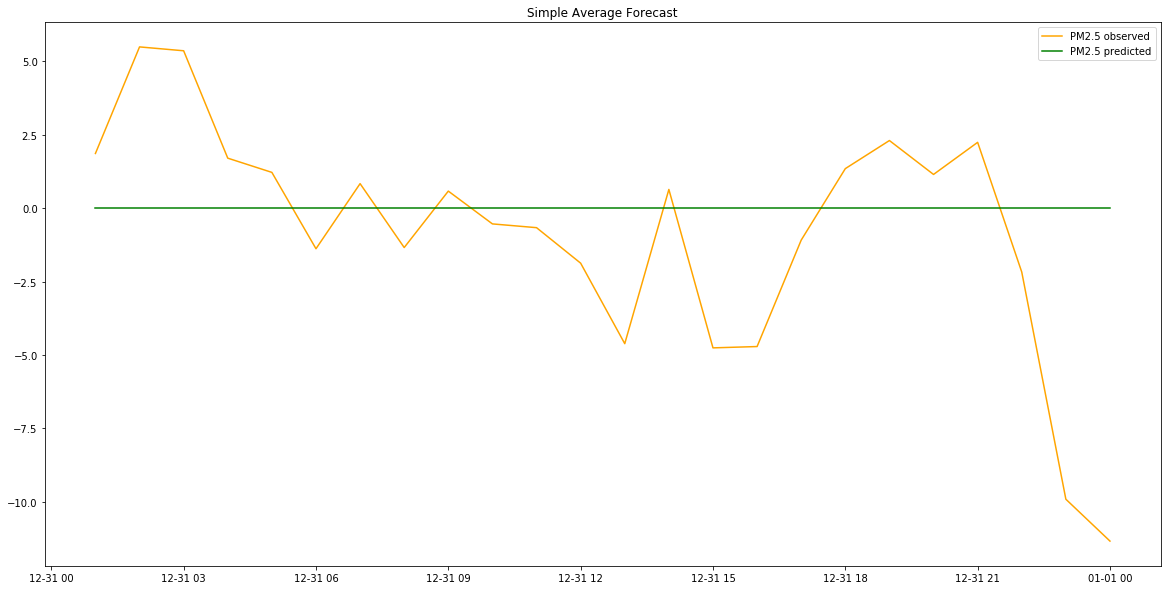

In [37]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted['pred'], 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [38]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted['pred'])
print(f'{model_name} RMSE {rmse}')

Simple Average Forecast RMSE 4.0243


### 7-Day Prediction

In [39]:
df = decomposed_dfd.resid.to_frame()
df.columns = ['pm25']
df.head()

,pm25
Datetime,
2008-01-01,-68.814036
2008-01-02,-11.795487
2008-01-03,1.764438
2008-01-04,3.714591
2008-01-05,1.840989


In [40]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_d,
                                         train_range_to=train_range_to_d,
                                         test_range_from=test_range_from_d,
                                         test_range_to=test_range_to_d)

common.py | 127 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:40:33 | INFO: Observations: 4019
common.py | 128 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:40:33 | INFO: Training Observations: 4012
common.py | 129 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:40:33 | INFO: Testing Observations: 7
common.py | 131 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:40:33 | INFO: (4019, 1), (4012, 1), (7, 1), 4019


In [41]:
# Fit the model: Take an average of entire known dataset
model_fitted = df_train.mean()
model_fitted

pm25    0.04284
dtype: float64

In [42]:
# Predict
predicted = df_test.copy()
predicted['pred'] = model_fitted.values[0]
predicted

,pm25,pred
Datetime,,
2018-12-26,-22.271980,0.04284
2018-12-27,-14.902488,0.04284
2018-12-28,-2.545600,0.04284
2018-12-29,-1.032167,0.04284
2018-12-30,-8.194337,0.04284
2018-12-31,-8.209242,0.04284
2019-01-01,-19.869173,0.04284


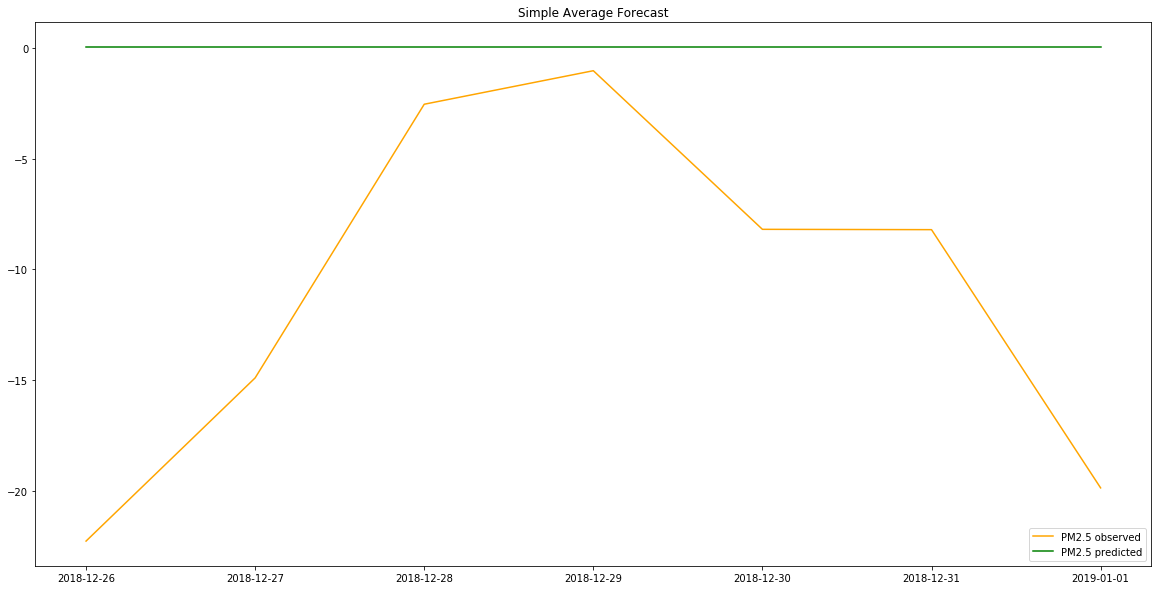

In [43]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted['pred'], 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [44]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted['pred'])
print(f'{model_name} RMSE {rmse}')

Simple Average Forecast RMSE 13.425


---
<a id='per'></a>

## Persistence Model
The `Persistence Model` naive forecasting technique assumes that the next expected point is equal to the last observed point.

<img src="images/ts_001_naive.png" style="width: 100px;"/>

The `Persistence Algorithm` uses the value at the current time step (t) to predict the expected outcome at the next time step (t+1). This satisfies the three above conditions for a baseline forecast.

The `Persistence Algorithm` is naive. It is often called the `Naive Forecast`. It assumes nothing about the specifics of the time series problem to which it is applied. This is what makes it so easy to understand and so quick to implement and evaluate.

The actual prediction and other performance measures depend on the last train data point value, and will be different for different dataset samples and train-test split point. The naive method isn’t suited for datasets with high variability.

In [45]:
model_name = 'Persistence Model'

### 24-Hour Prediction

In [46]:
df = decomposed_dfh.resid.to_frame()
df.columns = ['pm25']
df.head()

,pm25
Datetime,
2008-01-01 01:00:00,28.537801
2008-01-01 02:00:00,23.611710
2008-01-01 03:00:00,20.936157
2008-01-01 04:00:00,14.019144
2008-01-01 05:00:00,14.163808


In [47]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_h,
                                         train_range_to=train_range_to_h,
                                         test_range_from=test_range_from_h,
                                         test_range_to=test_range_to_h)

common.py | 127 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:41:13 | INFO: Observations: 96388
common.py | 128 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:41:13 | INFO: Training Observations: 96362
common.py | 129 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:41:13 | INFO: Testing Observations: 24
common.py | 131 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:41:13 | INFO: (96388, 1), (96362, 1), (24, 1), 96386


In [48]:
# Fit the model: Get last known observation from df_train
model_fitted = df_train[-1:]
model_fitted

,pm25
Datetime,
2018-12-30 23:00:00,5.442143


In [49]:
# Predict
predicted = df_test.copy()
predicted['pred'] = model_fitted['pm25'].values[0]
predicted

,pm25,pred
Datetime,,
2018-12-31 01:00:00,1.863587,5.442143
2018-12-31 02:00:00,5.492393,5.442143
2018-12-31 03:00:00,5.360633,5.442143
2018-12-31 04:00:00,1.703924,5.442143
2018-12-31 05:00:00,1.219429,5.442143
2018-12-31 06:00:00,-1.380934,5.442143
2018-12-31 07:00:00,0.836307,5.442143
2018-12-31 08:00:00,-1.339836,5.442143
2018-12-31 09:00:00,0.581865,5.442143


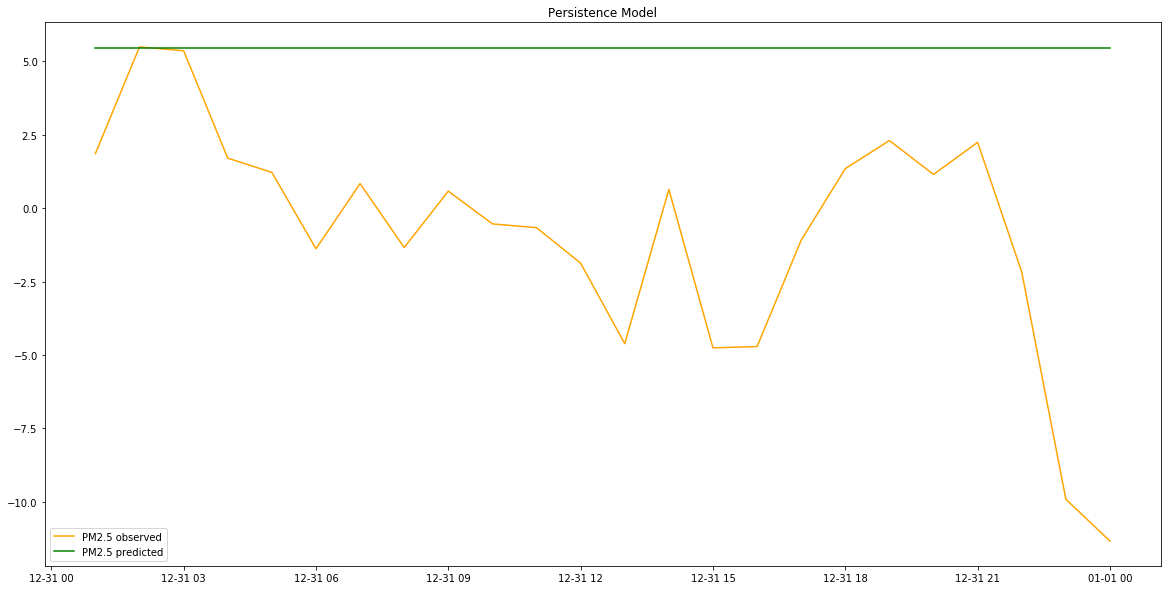

In [50]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted['pred'], 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [51]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted['pred'])
print(f'{model_name} RMSE {rmse}')

Persistence Model RMSE 7.3964


### 7-Day Prediction

In [52]:
df = decomposed_dfd.resid.to_frame()
df.columns = ['pm25']
df.head()

,pm25
Datetime,
2008-01-01,-68.814036
2008-01-02,-11.795487
2008-01-03,1.764438
2008-01-04,3.714591
2008-01-05,1.840989


In [53]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_d,
                                         train_range_to=train_range_to_d,
                                         test_range_from=test_range_from_d,
                                         test_range_to=test_range_to_d)

common.py | 127 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:41:35 | INFO: Observations: 4019
common.py | 128 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:41:35 | INFO: Training Observations: 4012
common.py | 129 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:41:35 | INFO: Testing Observations: 7
common.py | 131 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:41:35 | INFO: (4019, 1), (4012, 1), (7, 1), 4019


In [54]:
# Fit the model: Get last known observation from df_train
model_fitted = df_train[-1:]
model_fitted

,pm25
Datetime,
2018-12-25,-4.186148


In [55]:
# Predict
predicted = df_test.copy()
predicted['pred'] = model_fitted['pm25'].values[0]
predicted

,pm25,pred
Datetime,,
2018-12-26,-22.271980,-4.186148
2018-12-27,-14.902488,-4.186148
2018-12-28,-2.545600,-4.186148
2018-12-29,-1.032167,-4.186148
2018-12-30,-8.194337,-4.186148
2018-12-31,-8.209242,-4.186148
2019-01-01,-19.869173,-4.186148


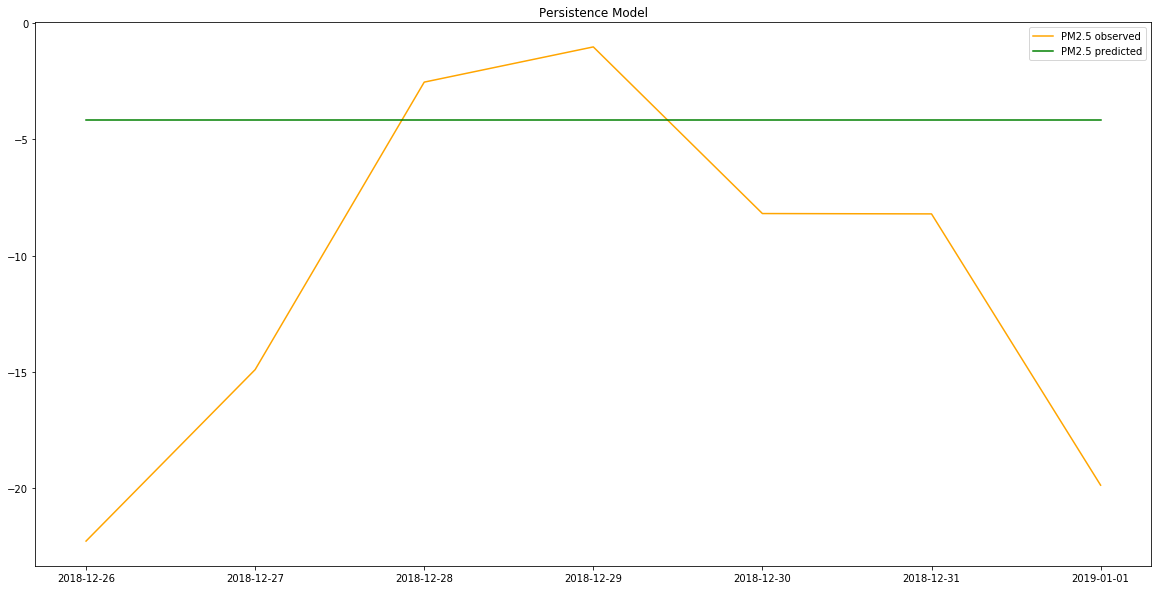

In [56]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted['pred'], 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [57]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted['pred'])
print(f'{model_name} RMSE {rmse}')

Persistence Model RMSE 10.2315


---
<a id='sma'></a>

## Simple Moving Average (SMA)

In [58]:
model_name = 'Simple Moving Average'

### 24-Hour Prediction

In [59]:
df = decomposed_dfh.resid.to_frame()
df.columns = ['pm25']
df.head()

,pm25
Datetime,
2008-01-01 01:00:00,28.537801
2008-01-01 02:00:00,23.611710
2008-01-01 03:00:00,20.936157
2008-01-01 04:00:00,14.019144
2008-01-01 05:00:00,14.163808


In [60]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_h,
                                         train_range_to=train_range_to_h,
                                         test_range_from=test_range_from_h,
                                         test_range_to=test_range_to_h)

common.py | 127 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:44:07 | INFO: Observations: 96388
common.py | 128 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:44:07 | INFO: Training Observations: 96362
common.py | 129 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:44:07 | INFO: Testing Observations: 24
common.py | 131 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:44:07 | INFO: (96388, 1), (96362, 1), (24, 1), 96386


In [68]:
# Different rolling window would be appropriate for different resamplings
rolling_window = 4 # for H
#rolling_window = 4 # for D

In [69]:
df_train.rolling(window=rolling_window).mean()[-1:]['pm25'][0]

4.364543203418319

In [70]:
df_test

,pm25
Datetime,
2018-12-31 01:00:00,1.863587
2018-12-31 02:00:00,5.492393
2018-12-31 03:00:00,5.360633
2018-12-31 04:00:00,1.703924
2018-12-31 05:00:00,1.219429
2018-12-31 06:00:00,-1.380934
2018-12-31 07:00:00,0.836307
2018-12-31 08:00:00,-1.339836
2018-12-31 09:00:00,0.581865


In [71]:
df_test[0:1].index

DatetimeIndex(['2018-12-31 01:00:00'], dtype='datetime64[ns]', name='Datetime', freq=None)

In [72]:
predicted = []
train = df_train.copy()

for i in range(len(df_test)):
    # Get the moving average for last element of train
    pred = train.rolling(window=rolling_window).mean()[-1:]['pm25'][0]
    # Add it as a predicted value
    predicted.append(pred)
    print(pred)
    # Create a new row with the next data point index from df_test
    train = train.append(df_test[i:i+1])
    # Replace df_test value with predicted value
    train.loc[df_test[i:i+1].index] = [pred]
    
predicted = train[-24:]

4.364543203418319
4.108018003614785
4.356522182035415
4.567806504830456
4.349222473475056
4.34539229098924
4.404735862832854
4.416789283032213
4.379034977582652
4.386488103609551
4.396762056764629
4.394768605247573
4.389263435801413
4.391820550356104
4.393153662042742
4.3922515633622705
4.391622302890945
4.392212019663328
4.392309886990133
4.392098943226981
4.392060788193158
4.392170409518711
4.392160006982557
4.392122536980663


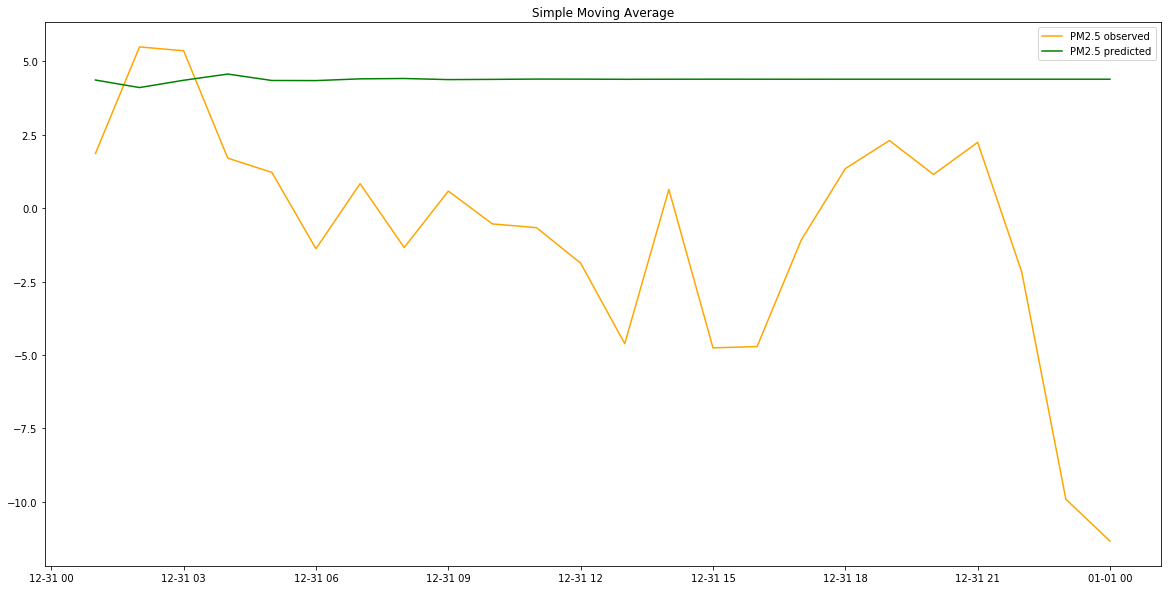

In [73]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted, 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted'
                          )

In [74]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted)
print(f'{model_name} RMSE {rmse}')

Simple Moving Average RMSE 6.535


### 7-Day Prediction

In [75]:
df = decomposed_dfd.resid.to_frame()
df.columns = ['pm25']
df.head()

,pm25
Datetime,
2008-01-01,-68.814036
2008-01-02,-11.795487
2008-01-03,1.764438
2008-01-04,3.714591
2008-01-05,1.840989


In [76]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_d,
                                         train_range_to=train_range_to_d,
                                         test_range_from=test_range_from_d,
                                         test_range_to=test_range_to_d)

common.py | 127 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:45:02 | INFO: Observations: 4019
common.py | 128 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:45:02 | INFO: Training Observations: 4012
common.py | 129 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:45:02 | INFO: Testing Observations: 7
common.py | 131 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:45:02 | INFO: (4019, 1), (4012, 1), (7, 1), 4019


In [77]:
# Different rolling window would be appropriate for different resamplings
#rolling_window = 4 # for H
rolling_window = 4 # for D

In [79]:
df_test

,pm25
Datetime,
2018-12-26,-22.271980
2018-12-27,-14.902488
2018-12-28,-2.545600
2018-12-29,-1.032167
2018-12-30,-8.194337
2018-12-31,-8.209242
2019-01-01,-19.869173


In [80]:
predicted = []
train = df_train.copy()

for i in range(len(df_test)):
    # Get the moving average for last element of train
    pred = train.rolling(window=rolling_window).mean()[-1:]['pm25'][0]
    # Add it as a predicted value
    predicted.append(pred)
    print(pred)
    # Create a new row with the next data point index from df_test
    train = train.append(df_test[i:i+1])
    # Replace df_test value with predicted value
    train.loc[df_test[i:i+1].index] = [pred]
    
predicted = train[-7:]

-8.293448482925784
-6.170849590468399
-6.2749639520741
-6.231352545766324
-6.742653642808695
-6.354954932779423
-6.400981268357178


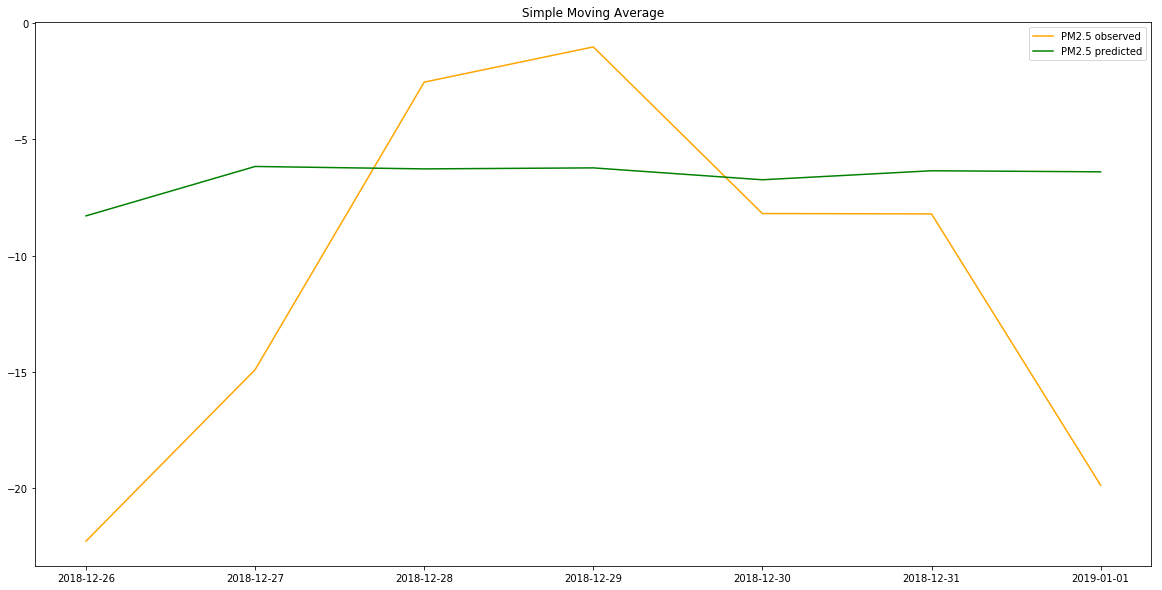

In [81]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted, 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [82]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted)
print(f'{model_name} RMSE {rmse}')

Simple Moving Average RMSE 8.4475


---
<a id='ema'></a>

## Exponential Moving Average

In [83]:
model_name = 'Exponential Moving Average'

### 24-Hour Prediction

In [84]:
df = decomposed_dfh.resid.to_frame()
df.columns = ['pm25']
df.head()

,pm25
Datetime,
2008-01-01 01:00:00,28.537801
2008-01-01 02:00:00,23.611710
2008-01-01 03:00:00,20.936157
2008-01-01 04:00:00,14.019144
2008-01-01 05:00:00,14.163808


In [85]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_h,
                                         train_range_to=train_range_to_h,
                                         test_range_from=test_range_from_h,
                                         test_range_to=test_range_to_h)

common.py | 127 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:46:07 | INFO: Observations: 96388
common.py | 128 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:46:07 | INFO: Training Observations: 96362
common.py | 129 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:46:07 | INFO: Testing Observations: 24
common.py | 131 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:46:07 | INFO: (96388, 1), (96362, 1), (24, 1), 96386


In [86]:
# Different rolling window would be appropriate for different resamplings
rolling_window = 4 # for H
#rolling_window = 4 # for D

In [87]:
predicted = []
train = df_train.copy()

for i in range(len(df_test)):
    # Get the moving average (Exponentially-weighted-window) for last element of train
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows
    pred = train.ewm(span=30, adjust=False).mean()[-1:]['pm25'][0]
    # Add it as a predicted value
    predicted.append(pred)
    print(pred)
    # Create a new row with the next data point index from df_test
    train = train.append(df_test[i:i+1])
    # Replace df_test value with predicted value
    train.loc[df_test[i:i+1].index] = [pred]
    
predicted = train[-24:]

2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873
2.1679098583984873


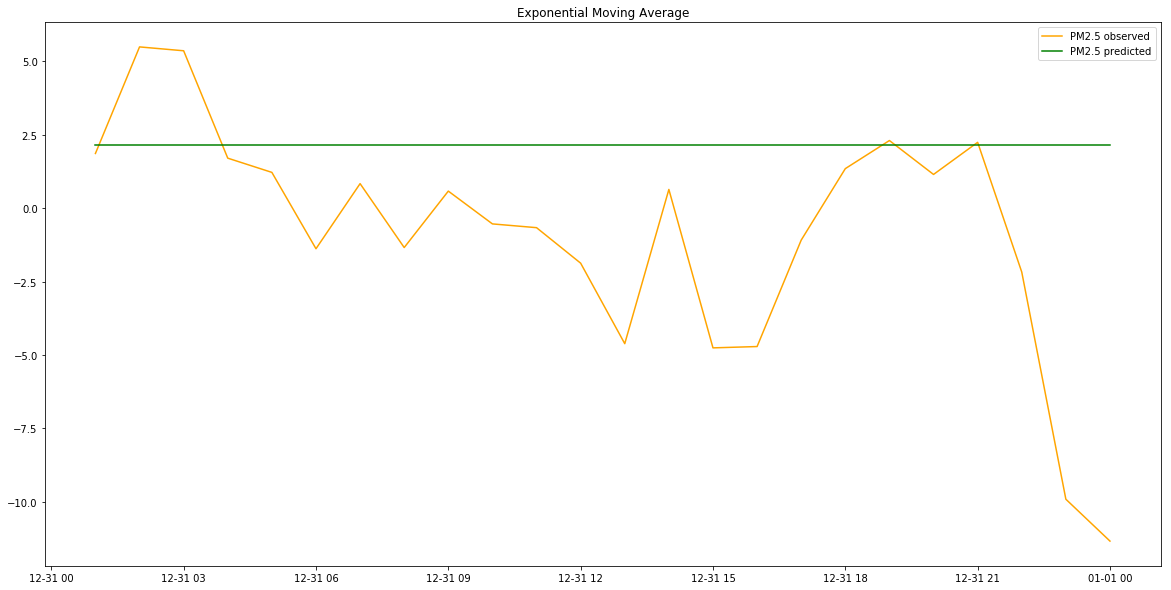

In [88]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted, 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [89]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted)
print(f'{model_name} RMSE {rmse}')

Exponential Moving Average RMSE 4.9427


### 7-Day Prediction

In [90]:
df = decomposed_dfd.resid.to_frame()
df.columns = ['pm25']
df.head()

,pm25
Datetime,
2008-01-01,-68.814036
2008-01-02,-11.795487
2008-01-03,1.764438
2008-01-04,3.714591
2008-01-05,1.840989


In [91]:
df_train, df_test = split_df_for_ts_modelling_date_range(df,
                                         train_range_from=train_range_from_d,
                                         train_range_to=train_range_to_d,
                                         test_range_from=test_range_from_d,
                                         test_range_to=test_range_to_d)

common.py | 127 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:46:37 | INFO: Observations: 4019
common.py | 128 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:46:37 | INFO: Training Observations: 4012
common.py | 129 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:46:37 | INFO: Testing Observations: 7
common.py | 131 | split_df_for_ts_modelling_date_range | 02-Jun-20 23:46:37 | INFO: (4019, 1), (4012, 1), (7, 1), 4019


In [92]:
# Different rolling window would be appropriate for different resamplings
#rolling_window = 4 # for H
rolling_window = 4 # for D

In [93]:
predicted = []
train = df_train.copy()

for i in range(len(df_test)):
    # Get the moving average (Exponentially-weighted-window) for last element of train
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows
    pred = train.ewm(span=30, adjust=False).mean()[-1:]['pm25'][0]
    # Add it as a predicted value
    predicted.append(pred)
    print(pred)
    # Create a new row with the next data point index from df_test
    train = train.append(df_test[i:i+1])
    # Replace df_test value with predicted value
    train.loc[df_test[i:i+1].index] = [pred]
    
predicted = train[-7:]

-2.1386926758636235
-2.1386926758636235
-2.1386926758636235
-2.1386926758636235
-2.1386926758636235
-2.1386926758636235
-2.1386926758636235


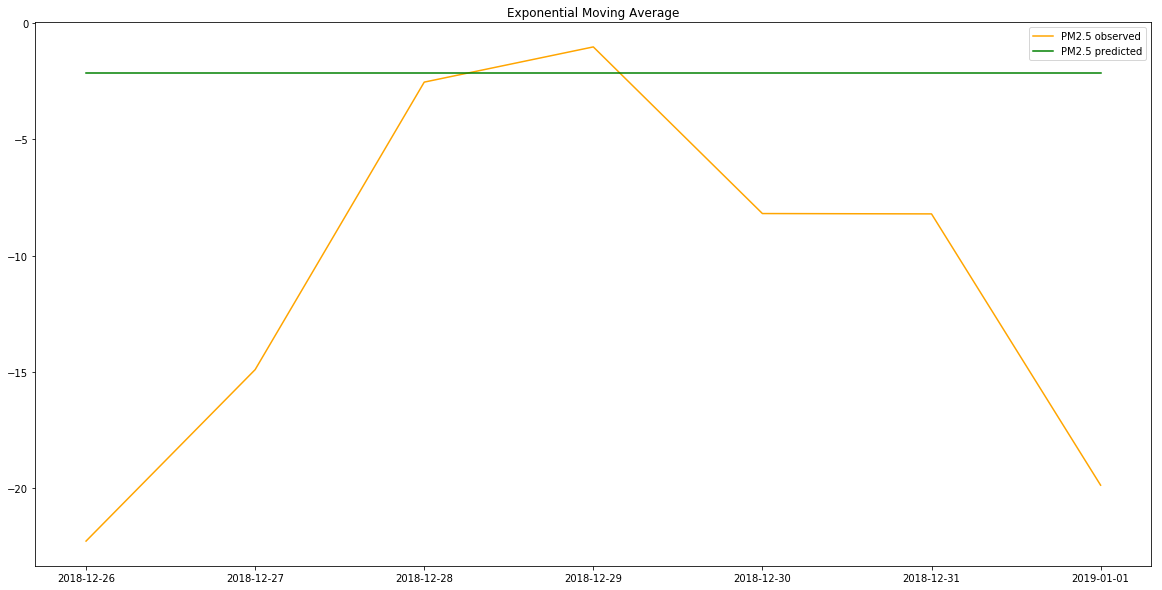

In [94]:
plot_observed_vs_predicted(observed=df_test['pm25'], 
                           predicted=predicted, 
                           num_points=50, 
                           title=model_name,
                           label_observed='PM2.5 observed', 
                           label_predicted='PM2.5 predicted')

In [95]:
rmse = get_rmse(observed=df_test['pm25'], predicted=predicted)
print(f'{model_name} RMSE {rmse}')

Exponential Moving Average RMSE 11.6958
